ref:
* https://blog.dominodatalab.com/shap-lime-python-libraries-part-1-great-explainers-pros-cons/

* https://blog.dominodatalab.com/shap-lime-python-libraries-part-2-using-shap-lime

In [1]:
# Load Libraries
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
import shap
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
import time
%matplotlib inline

/home/lingjiebao/anaconda3/envs/py39/lib/python3.9/site-packages/numba/core/errors.py:194: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
print("shap.__version__:",shap.__version__)
print("xgboost.__version__:",xgb.__version__)
print("sklearn.__version__:",sklearn.__version__)
# print("lime.__version__:",lime.__version__)

shap.__version__: 0.47.2
xgboost.__version__: 2.1.4
sklearn.__version__: 1.4.2


In [ ]:
# Load Boston Housing Data
# 加载加州房价数据集
# from sklearn.datasets import fetch_california_housing
# X, y = fetch_california_housing(return_X_y=True)
# # Load the dataset from a CSV file
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
# path = "BostonHousing.csv"
data = pd.read_csv(url=url)

# # Separate features and target
# X = data.drop('medv', axis=1).values
# y = data['medv'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
X_train

array([[3.5809e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.9170e+02,
        9.7100e+00],
       [1.5876e-01, 0.0000e+00, 1.0810e+01, ..., 1.9200e+01, 3.7694e+02,
        9.8800e+00],
       [1.1329e-01, 3.0000e+01, 4.9300e+00, ..., 1.6600e+01, 3.9125e+02,
        1.1380e+01],
       ...,
       [1.5098e-01, 0.0000e+00, 1.0010e+01, ..., 1.7800e+01, 3.9451e+02,
        1.0300e+01],
       [2.2927e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.9274e+02,
        1.8800e+01],
       [1.3914e-01, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9690e+02,
        1.4690e+01]])

In [6]:
y_train,y_train.shape

(array([26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1,
        20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5, 12.3, 19.4, 21.2,
        20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4,
        35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6,
        32.9, 36.2, 11. ,  7.2, 22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5,
        15.2, 17.4, 13.6,  8.7, 18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9,
        25. , 12.7, 29.1, 12. , 17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8,
        20.5, 14.9, 10.9, 19.5, 22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3,
        11.8, 31. , 28.7, 16.2, 43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9,
        20.2, 43.1, 34.6, 13.8, 24.3, 21.5, 24.4, 21.2, 23.8, 26.6, 25.1,
         9.6, 19.4, 19.4,  9.5, 14. , 26.5, 13.8, 34.7, 16.3, 21.7, 17.5,
        15.6, 20.9, 21.7, 12.7, 18.5, 23.7, 19.3, 12.7, 21.6, 23.2, 29.6,
        21.2, 23.8, 17.1, 22. , 36.5, 18.8, 21.9, 23.1, 20.2, 17.4, 37. ,
        24.1, 36.2, 15.7, 32.2, 13.5, 

In [7]:
# K Nearest Neighbor
knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

## Create the SHAP Explainers
1. SHAP has the following explainers: deep, gradient, kernel, linear, tree, sampling
2. Must use Kernel method on knn
3. **Summarizing the data with k-Means** is a trick to **speed up the processing**

Rather than use the whole training set to estimate expected values, we summarize with
**a set of weighted kmeans**, each weighted by the number of points they represent.
Running without kmeans took 1 hr 6 mins 7 sec. Running with kmeans took 2 min 47 sec.

Boston Housing is a small dataset.
Running SHAP on models that require the Kernel method becomes prohibitive.

In [8]:
# build the kmeans summary
X_train_summary = shap.kmeans(X_train, 100)


In [9]:
# using the kmeans summary
t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict,X_train_summary)
shap_values_KNN_test = explainerKNN.shap_values(X_test)
t1 = time.time()
timeit=t1-t0
timeit

  0%|          | 0/102 [00:00<?, ?it/s]

35.762407302856445

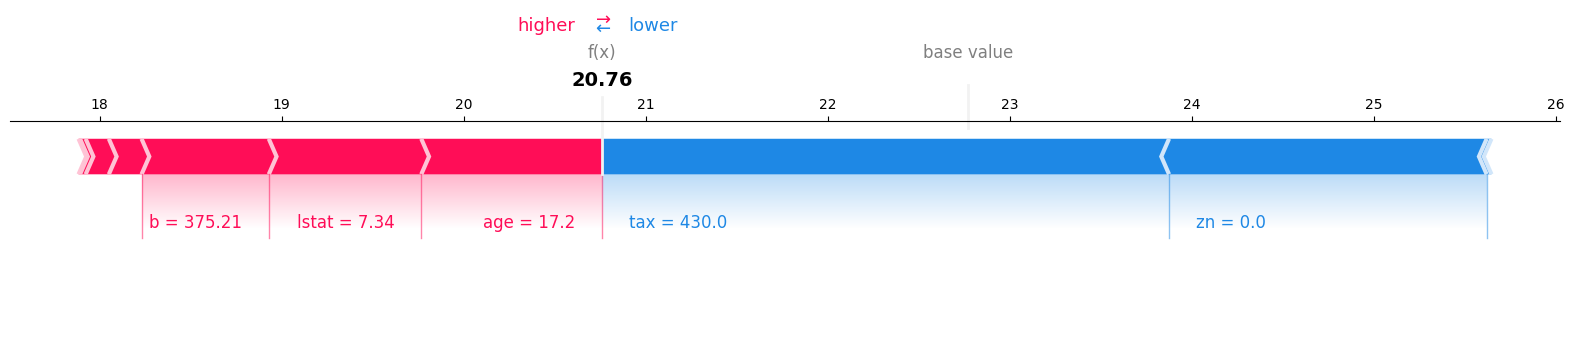

In [10]:
## visualization for first sample
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[0], X_test[0], matplotlib=True, feature_names=data.columns.tolist()[:-1])

In [11]:
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[0], X_test[0],  feature_names=data.columns.tolist()[:-1])

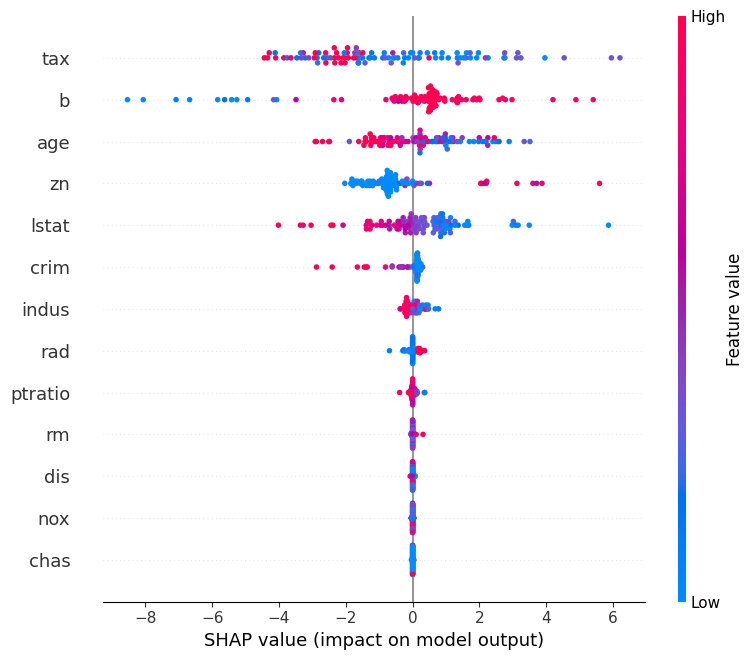

In [12]:
shap.summary_plot(shap_values_KNN_test, X_test, feature_names=data.columns.tolist()[:-1])

### without kmeans

In [13]:
t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict, X_train)
shap_values_KNN_test = explainerKNN.shap_values(X_test)
t1 = time.time()
timeit=t1-t0
timeit

Using 404 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/102 [00:00<?, ?it/s]

135.31155824661255

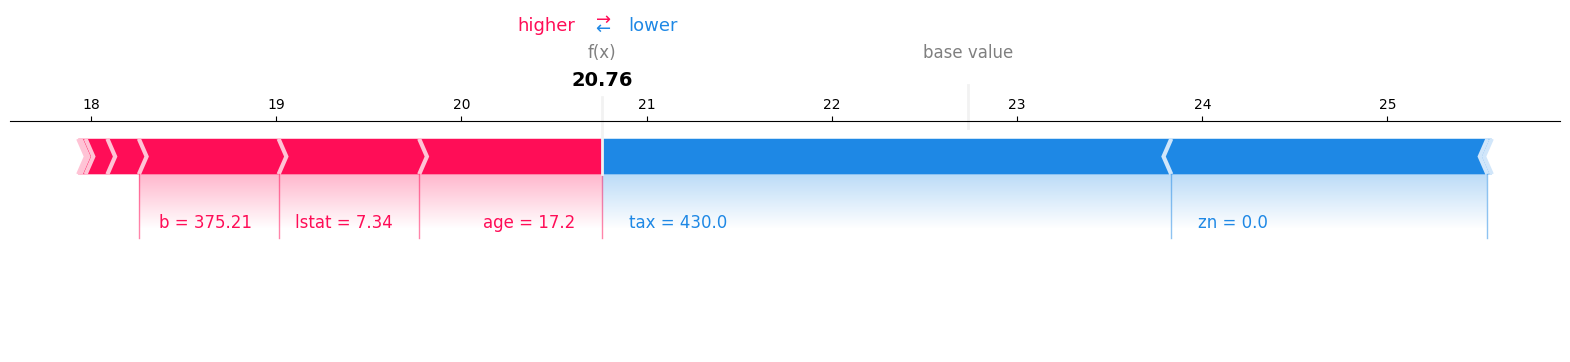

In [14]:
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[0], X_test[0], matplotlib=True, feature_names=data.columns.tolist()[:-1])

In [15]:
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[0], X_test[0], feature_names=data.columns.tolist()[:-1])

### Build an XGBoost model

In [16]:
# Build an XGBoost model
xgb_model = xgb.train({'objective':'reg:linear'}, xgb.DMatrix(X_train, label=y_train))

/home/lingjiebao/anaconda3/envs/py39/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:49:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


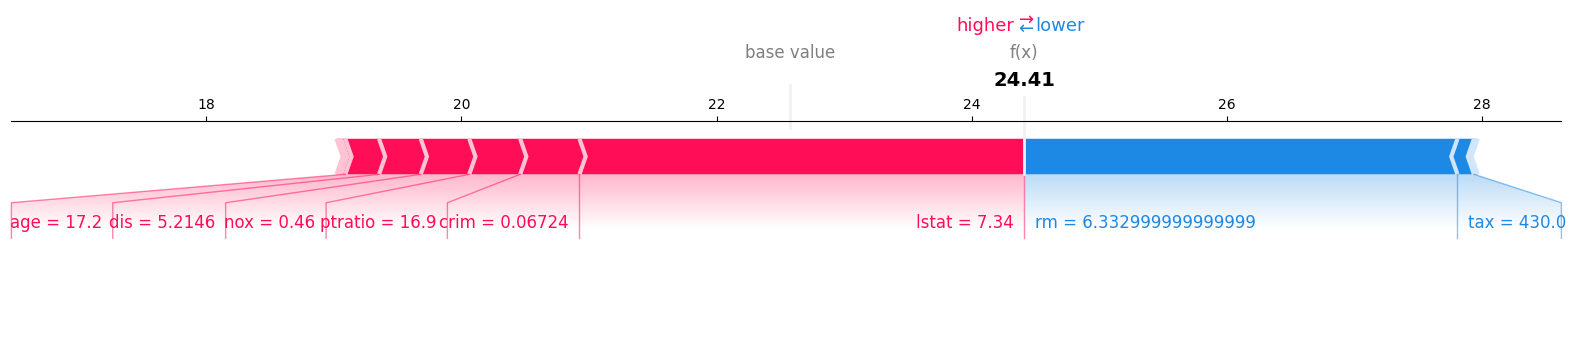

In [17]:
explainerXGB = shap.TreeExplainer(xgb_model)
shap_values_XGB_test = explainerXGB.shap_values(X_test)
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[0], X_test[0], matplotlib=True, feature_names=data.columns.tolist()[:-1])## 可视化第一个prediction的解释   如果不想用JS,传入matplotlib=True


In [18]:
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[0], X_test[0], feature_names=data.columns.tolist()[:-1])

Running SHAP on a knn model built on the Boston Housing dataset took over an hour, which is **a tough pill to swallow**. We can get that down to three minutes if we **sacrifice some accuracy and reliability** by summarizing the data first with a k-means algorithm.

## LIME

As an alternative approach, we could use LIME. LIME **runs instantaneously** with the same knn model and does not require summarizing with k-means.

With LIME **not having the same accuracy and consistency properties** as Shapley Values, and with SHAP using a k-means summary before calculating influence scores, it’s tough to tell which comes closer to the correct answer.


While LIME provided a nice alternative in the knn model example, **LIME is unfortunately not always able to save the day**. It doesn’t work out-of-the-box on all models. 

I personally prefer to use SHAP when I can and rely on LIME when SHAP’s compute costs are too high

# PART 2

In [19]:
import pandas as pd #for manipulating data
import numpy as np #for manipulating data
import sklearn #for building models
import xgboost as xgb #for building models
import sklearn.ensemble #for building models
from sklearn.model_selection import train_test_split #for creating a hold-out sample
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do
import shap #SHAP package
import time #some of the routines take a while so we monitor the time
import os #needed to use Environment Variables in Domino
import matplotlib.pyplot as plt #for custom graphs at the end
import seaborn as sns #for custom graphs at the end
shap.initjs()

In [20]:
# X,y = shap.datasets.boston()
path = "BostonHousing.csv"
data = pd.read_csv(path)
X = data.drop('medv', axis=1).values
y = data['medv'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**two gradient boosted tree models**, **a random forest model** and **a nearest neighbor model**.

In [21]:
# XGBoost
xgb_model = xgb.train({'objective':'reg:linear'}, xgb.DMatrix(X_train, label=y_train))
 
# GBT from scikit-learn
sk_xgb = sklearn.ensemble.GradientBoostingRegressor()
sk_xgb.fit(X_train, y_train)

# Random Forest
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)
 
# K Nearest Neighbor
knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

### The SHAP Python library has the following explainers available: 

1. deep (a fast, but approximate, algorithm to compute SHAP values for **deep learning models** based on the DeepLIFT algorithm); 

2. gradient (combines ideas from Integrated Gradients, SHAP and SmoothGrad into a single expected value equation for **deep learning models**); 

3. kernel (**a specially weighted local linear regression** to estimate SHAP values for any model); 

4. linear (compute the exact SHAP values for **a linear model** with independent features); 

5. tree (a fast and exact algorithm to compute SHAP values for trees and ensembles of trees) 

6. sampling (computes SHAP values under the assumption of feature independence（在特征独立性假设下） — **a good alternative to kernel** when you want to use a large background set). 

In [22]:
# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb_model)
shap_values_XGB_test = explainerXGB.shap_values(X_test)
shap_values_XGB_train = explainerXGB.shap_values(X_train)
 
# Tree on Scikit GBT
explainerSKGBT = shap.TreeExplainer(sk_xgb)
shap_values_SKGBT_test = explainerSKGBT.shap_values(X_test)
shap_values_SKGBT_train = explainerSKGBT.shap_values(X_train)
 
# Tree on Random Forest 
explainerRF = shap.TreeExplainer(rf)
shap_values_RF_test = explainerRF.shap_values(X_test)
shap_values_RF_train = explainerRF.shap_values(X_train)

The authors of SHAP recommend summarizing the data first with **a K-Means procedure**

In [23]:
"""
Must use Kernel method on KNN.
Rather than use the whole training set to estimate expected values, we summarize with
a set of weighted kmeans, each weighted by the number of points they represent.
Running without the kmeans took 1 hr 6 mins 7 sec. 
Running with the kmeans took 2 min 47 sec.
Boston Housing is a very small dataset.
Running SHAP on models that require Kernel method and have a good amount of data becomes prohibitive. 
"""
X_train_summary = shap.kmeans(X_train, 10)
 
# using kmeans
t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict, X_train_summary)
shap_values_KNN_test = explainerKNN.shap_values(X_test)
shap_values_KNN_train = explainerKNN.shap_values(X_train)
t1 = time.time()
timeit=t1-t0
timeit

  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/404 [00:00<?, ?it/s]

35.98956847190857

it helpful to **put all the SHAP values** into **dataframes** for later use.

In [24]:
# XGBoost
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=data.columns.values.tolist()[:-1])
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=data.columns.values.tolist()[:-1])
# Scikit GBT
df_shap_SKGBT_test = pd.DataFrame(shap_values_SKGBT_test, columns=data.columns.values.tolist()[:-1])
df_shap_SKGBT_train = pd.DataFrame(shap_values_SKGBT_train, columns=data.columns.values.tolist()[:-1])
# Random Forest
df_shap_RF_test = pd.DataFrame(shap_values_RF_test, columns=data.columns.values.tolist()[:-1])
df_shap_RF_train = pd.DataFrame(shap_values_RF_train, columns=data.columns.values.tolist()[:-1])
# KNN
df_shap_KNN_test = pd.DataFrame(shap_values_KNN_test, columns=data.columns.values.tolist()[:-1])
df_shap_KNN_train = pd.DataFrame(shap_values_KNN_train, columns=data.columns.values.tolist()[:-1])

In [25]:
# if a feature has 10 or less unique values then treat it as categorical
categorical_features = np.argwhere(np.array([len(set(X_train[:,x]))
for x in range(X_train.shape[1])]) <= 10).flatten()

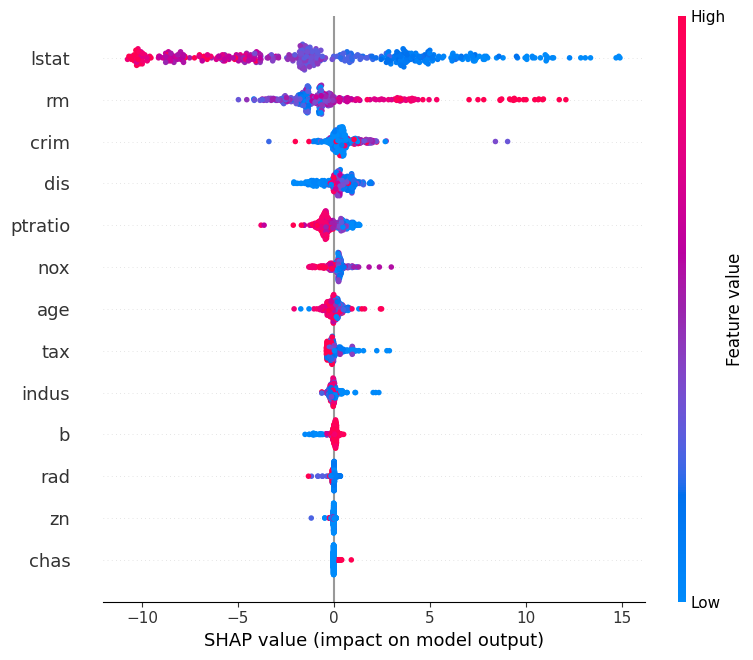

In [26]:
shap.summary_plot(shap_values_XGB_train, X_train, feature_names=data.columns.tolist()[:-1])

In [27]:
help(shap.dependence_plot)

Help on function dependence_legacy in module shap.plots._scatter:

dependence_legacy(ind, shap_values=None, features=None, feature_names=None, display_features=None, interaction_index='auto', color='#1E88E5', axis_color='#333333', cmap=None, dot_size=16, x_jitter=0, alpha=1, title=None, xmin=None, xmax=None, ax=None, show=True, ymin=None, ymax=None)
    Create a SHAP dependence plot, colored by an interaction feature.
    
    Plots the value of the feature on the x-axis and the SHAP value of the same feature
    on the y-axis. This shows how the model depends on the given feature, and is like a
    richer extension of the classical partial dependence plots. Vertical dispersion of the
    data points represents interaction effects. Grey ticks along the y-axis are data
    points where the feature's value was NaN.
    
    
    Parameters
    ----------
    ind : int or string
        If this is an int it is the index of the feature to plot. If this is a string it is
        either the 

In [28]:
df_shap_XGB_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.391170,0.043140,-0.120323,0.126829,0.201139,2.114773,-0.720924,0.745434,-0.150491,-0.096209,0.429731,0.103496,0.427269
1,0.453259,-0.015873,-0.101223,-0.007233,0.214516,-2.516814,0.745928,0.265563,0.023670,-0.153708,-0.311253,0.106501,0.455176
2,0.532577,-0.173838,-0.185781,-0.020087,0.244012,0.761475,0.197585,0.186987,-0.053750,0.038113,0.587195,-0.005220,-2.448737
3,0.367998,-0.024498,-0.180300,-0.018437,0.265345,-1.845178,0.426510,0.390569,0.011385,-0.050709,0.916672,0.022017,-1.384922
4,1.321389,-0.002616,0.010963,-0.018554,-1.110637,-0.662209,0.064048,-1.119316,-0.063537,-0.345571,-0.471009,0.061849,-10.124851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.210065,-0.015873,-0.352598,-0.019770,0.251399,-1.747095,-0.575246,-0.028786,0.016077,0.210760,-0.434280,0.026196,-1.714425
400,0.423950,-0.136781,0.091557,-0.004816,0.372394,3.384468,0.263249,0.246742,0.065082,0.004348,0.413149,0.076732,8.022230
401,0.333438,-0.003084,-0.226541,-0.025966,0.267290,-1.629940,-0.510787,0.794220,-0.049292,-0.079288,0.028915,0.126765,-1.541075
402,0.454358,-0.014124,-0.154406,-0.026634,0.130092,-1.421651,-0.312882,0.572159,-0.129308,0.191258,-0.088641,0.127971,-4.406782


In [29]:
X_train

array([[3.5809e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.9170e+02,
        9.7100e+00],
       [1.5876e-01, 0.0000e+00, 1.0810e+01, ..., 1.9200e+01, 3.7694e+02,
        9.8800e+00],
       [1.1329e-01, 3.0000e+01, 4.9300e+00, ..., 1.6600e+01, 3.9125e+02,
        1.1380e+01],
       ...,
       [1.5098e-01, 0.0000e+00, 1.0010e+01, ..., 1.7800e+01, 3.9451e+02,
        1.0300e+01],
       [2.2927e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.9274e+02,
        1.8800e+01],
       [1.3914e-01, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9690e+02,
        1.4690e+01]])

In [30]:
pd.DataFrame(X_train,columns=data.columns.to_list()[:-1])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
1,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
2,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
3,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
400,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
401,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
402,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [31]:
pd.DataFrame(X_train,columns=data.columns.to_list()[:-1])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
1,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
2,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
3,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
400,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
401,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
402,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [32]:
df_shap_XGB_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.391170,0.043140,-0.120323,0.126829,0.201139,2.114773,-0.720924,0.745434,-0.150491,-0.096209,0.429731,0.103496,0.427269
1,0.453259,-0.015873,-0.101223,-0.007233,0.214516,-2.516814,0.745928,0.265563,0.023670,-0.153708,-0.311253,0.106501,0.455176
2,0.532577,-0.173838,-0.185781,-0.020087,0.244012,0.761475,0.197585,0.186987,-0.053750,0.038113,0.587195,-0.005220,-2.448737
3,0.367998,-0.024498,-0.180300,-0.018437,0.265345,-1.845178,0.426510,0.390569,0.011385,-0.050709,0.916672,0.022017,-1.384922
4,1.321389,-0.002616,0.010963,-0.018554,-1.110637,-0.662209,0.064048,-1.119316,-0.063537,-0.345571,-0.471009,0.061849,-10.124851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.210065,-0.015873,-0.352598,-0.019770,0.251399,-1.747095,-0.575246,-0.028786,0.016077,0.210760,-0.434280,0.026196,-1.714425
400,0.423950,-0.136781,0.091557,-0.004816,0.372394,3.384468,0.263249,0.246742,0.065082,0.004348,0.413149,0.076732,8.022230
401,0.333438,-0.003084,-0.226541,-0.025966,0.267290,-1.629940,-0.510787,0.794220,-0.049292,-0.079288,0.028915,0.126765,-1.541075
402,0.454358,-0.014124,-0.154406,-0.026634,0.130092,-1.421651,-0.312882,0.572159,-0.129308,0.191258,-0.088641,0.127971,-4.406782


In [ ]:
## TODO：dependence_plot

In [ ]:
# temp_df = pd.DataFrame(X_train,columns=data.columns.to_list()[:-1])
# shap_plt = shap.dependence_plot("lstat", df_shap_XGB_train.iloc[:,-1], temp_df.iloc[:,-1])

IndexError: tuple index out of range

In [ ]:
# shap.plots.scatter(df_shap_XGB_train[:, "lstat"], dot_size=2, color=df_shap_XGB_train)  # default dot_size is 16

TypeError: '(slice(None, None, None), 'lstat')' is an invalid key

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

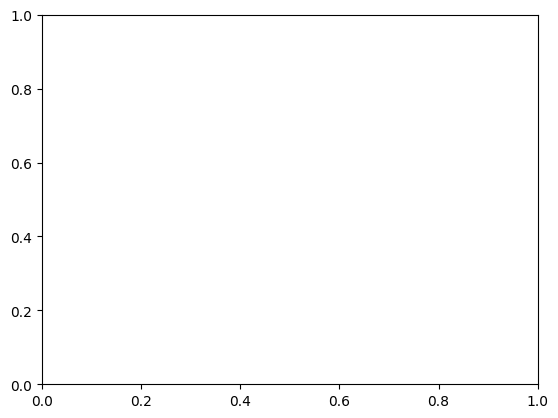

In [ ]:
# temp_df = pd.DataFrame(X_test,columns=data.columns.to_list()[:-1])

# j=0
# # inputs = column of interest as string, column for coloring as string, df of our data, SHAP df, 
# #      x position of the black dot, y position of the black dot
# def dep_plt(col, color_by, base_actual_df, base_shap_df, overlay_x, overlay_y):
#     cmap=sns.diverging_palette(260, 10, sep=1, as_cmap=True) #seaborn palette
#     f, ax = plt.subplots()
#     points = ax.scatter(base_actual_df[col], base_shap_df[col], c=base_actual_df[color_by], s=20, cmap=cmap)
#     f.colorbar(points).set_label(color_by)
#     ax.scatter(overlay_x, overlay_y, color='black', s=50) 
#     plt.xlabel(col)
#     plt.ylabel("SHAP value for " + col)
#     plt.show()

# # get list of model inputs in order of SHAP importance
# imp_cols = df_shap_XGB_train.abs().mean().sort_values(ascending=False).index.tolist()
 
# # loop through this list to show top 3 dependency plots
# for i in range(0, len(imp_cols)):
#     #plot the top var and color by the 2nd var
#     if i == 0 :
#         dep_plt(imp_cols[i],
#         imp_cols[i+1],
#         X_train,
#         df_shap_XGB_train,
#         temp_df.iloc[j,:][imp_cols[i]],
#         df_shap_XGB_test.iloc[j,:][imp_cols[i]])
#      #plot the 2nd and 3rd vars and color by the top var 
#     if (i>0) and (i<3) : 
#         dep_plt(imp_cols[i], 
#         imp_cols[0],
#         X_train,
#         df_shap_XGB_train,
#         temp_df.iloc[j,:][imp_cols[i]],
#         df_shap_XGB_test.iloc[j,:][imp_cols[i]])